---

<center><h5>CS 5661 Topics in Data Sciences</h5></center>

---

<center><h1>The Whale Project</h1></center>
<center><h3>Humpback Whale Identification</h3></center>

---

### Importing header files

In [1]:
import os
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import keras.backend as K

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

start_time = time.time()

Using TensorFlow backend.


---

### Reading train.csv for image file names

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/sample_submission.csv")

test_df['Id'] = ''

---

### Reading data from images

Preparing a 100x100 dataset

In [3]:
X_train = np.zeros((len(train_df['Image']), 100, 100, 3))
X_test = np.zeros((len(test_df), 100, 100, 3))

for i in range(0, len(train_df['Image'])):
    X_train[i] = preprocess_input(image.img_to_array(image.load_img("../input/train/"+train_df['Image'][i], target_size=(100, 100, 3))))
    X_train[i] = X_train[i] / 255
    
    if i in range(0, len(test_df)):
        #load images into images of size 100x100x3
        X_test[i] = preprocess_input(image.img_to_array(image.load_img("../input/test/"+test_df['Image'][i], target_size=(100, 100, 3))))
        X_test[i] = X_test[i] / 255
    
print("Done!")

Done!


In [4]:
values = np.array(train_df['Id'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y_train = onehot_encoded

print(y_train.shape)

[4786 3808  662 ... 3671 3103    0]
(25361, 5005)


In [5]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
#model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
#model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = "softmax"))

model.summary()

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)    

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1, callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25361/25361 [==============================] - 1010s 40ms/step - loss: 6.5377 - acc: 0.3348
Epoch 2/20
25361/25361 [==============================] - 1003s 40ms/step - loss: 5.4520 - acc: 0.3809
Epoch 3/20
25361/25361 [==============================] - 990s 39ms/step - loss: 5.1321 - acc: 0.3807
Epoch 4/20
25361/25361 [==============================] - 988s 39ms/step - loss: 4.8116 - acc: 0.3811
Epoch 5/20
25361/25361 [==============================] - 988s 39ms/step - loss: 4.4714 - acc: 0.3831
Epoch 6/20
25361/25361 [==============================] - 989s 39ms/step - loss: 4.0931 - acc: 0.3883
Epoch 7/20
25361/25361 [==============================] - 1010s 40ms/step - loss: 3.6802 - acc: 0.3968
Epoch 8/20
25361/25361 [==============================] - 1007s 40ms/step - loss: 3.2433 - acc: 0.4133
Epoch 9/20
25361/25361 [==============================] - 990s 39ms/step - loss: 2.7949 - acc: 0.4406
Epoch 10/20
25361/25361 [=====

190

In [23]:
print('Training accuracy of the model: ',history.history['acc'][-1])
print('Training loss of the model: ',history.history['loss'][-1])

Training accuracy of the model:  0.9275659474564681
Training loss of the model:  0.299272368615238


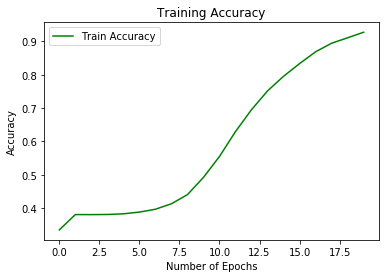

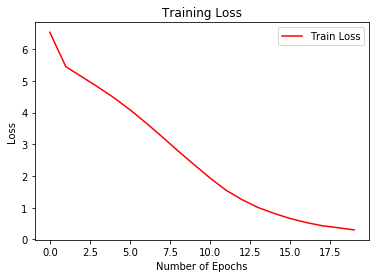

In [11]:
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
predictions = model.predict(np.array(X_test), verbose=1)

7960/7960 [==============================] - 109s 14ms/step


In [38]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))
    
print(test_df[0:20])

dataframe = pd.DataFrame(data=test_df)

            Image                                                 Id
0   00028a005.jpg  new_whale w_69b5ace w_8431ae8 w_75f6ffa w_bb2c919
1   000dcf7d8.jpg  new_whale w_bb2cbcf w_698fcbe w_b7b0ad7 w_6aab519
2   000e7c7df.jpg  new_whale w_4c218b5 w_c5ee28a w_b5e6c80 w_75ec7c1
3   0019c34f4.jpg  w_f765256 w_954fec8 w_59052ad w_5ff2049 w_bd1c3d5
4   001a4d292.jpg  new_whale w_4bf625b w_2e29743 w_7e9df91 w_fec331a
5   00247bc36.jpg  new_whale w_e54d8f6 w_23a388d w_0c23936 w_05d65b9
6   0027089a4.jpg  w_7e2eb3d w_13aa123 w_6f0cbe3 w_72ab123 new_whale
7   002de4d94.jpg  new_whale w_c0f1e04 w_e2372d6 w_8f4d879 w_8cfabed
8   002f52f0c.jpg  new_whale w_535448f w_1b4bb29 w_877de07 w_39cd182
9   002fd89d4.jpg  w_9adf29b new_whale w_b805777 w_dced3f2 w_e5ab551
10  00313e2d2.jpg  w_5116e7e new_whale w_5816f86 w_14330a0 w_1ecca2d
11  00379666f.jpg  new_whale w_859dbc3 w_3879fa0 w_b6e4761 w_48fa708
12  0041a9867.jpg  new_whale w_0e7aae1 w_3962169 w_6b25530 w_17b0d3a
13  004344e9f.jpg  new_whale w_966

In [39]:
from IPython.display import HTML
import base64

title = "Downloav prediction.csv file"
filename = "prediction.csv"
csv = dataframe.to_csv(index=False)
b64 = base64.b64encode(csv.encode())
payload = b64.decode()
html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
html = html.format(payload=payload,title=title,filename=filename)
HTML(html)

end_time = time.time()
print("Submission time: ", (end_time - start_time) / 60.)